22-02-2024

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-2-ade3bbf5c8e8>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("AI in speech processing.m4a")
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


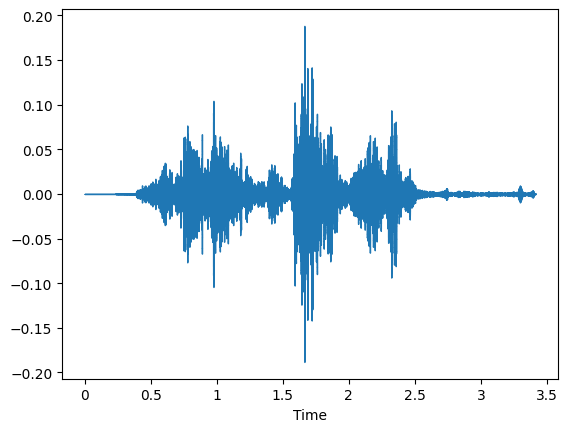

In [2]:
y, sr = librosa.load("AI in speech processing.m4a")
librosa.display.waveshow(y)

1


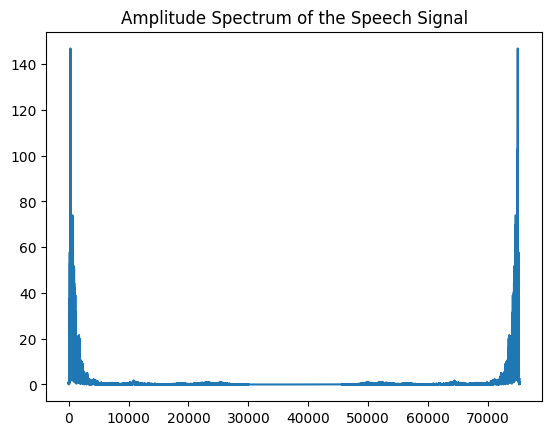

In [3]:
fft_y = np.fft.fft(y, n=None, axis=-1, norm=None)
amplitude = np.abs(fft_y)

# Plot the amplitude spectrum
plt.plot(amplitude)
plt.title("Amplitude Spectrum of the Speech Signal")
plt.show()

2

[ 6.04203007e-18-1.89477237e-18j  0.00000000e+00-2.24584736e-18j
  9.06304510e-18+4.37848041e-18j ...  2.63988378e-13+7.59729896e-18j
  1.84505472e-13+3.37643772e-18j -8.91996983e-13-1.01013000e-18j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


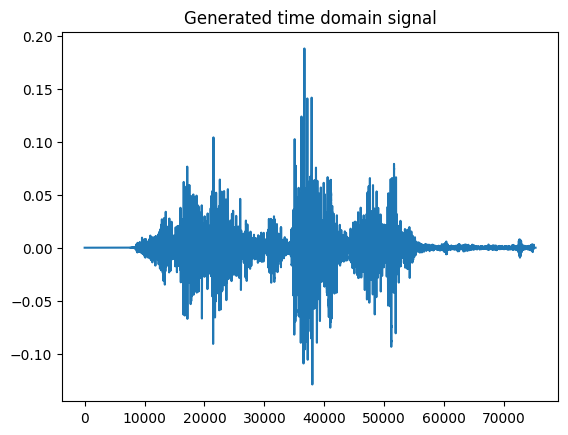

In [4]:
ifft_y = np.fft.ifft(fft_y, n=None, axis=-1, norm=None)
print(ifft_y)
# Plot the amplitude spectrum
plt.plot(ifft_y)
plt.title("Generated time domain signal")
plt.show()

3

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

intervals = librosa.effects.split(y, top_db = 20)
print(intervals)

speech_segments = [y[start:end] for start, end in intervals]

[[11776 33280]
 [33792 55296]]


In [6]:
from IPython.display import Audio, display
audio_segment = Audio(speech_segments[0], rate=sr)
display(audio_segment)

In [9]:
import IPython.display as ipd


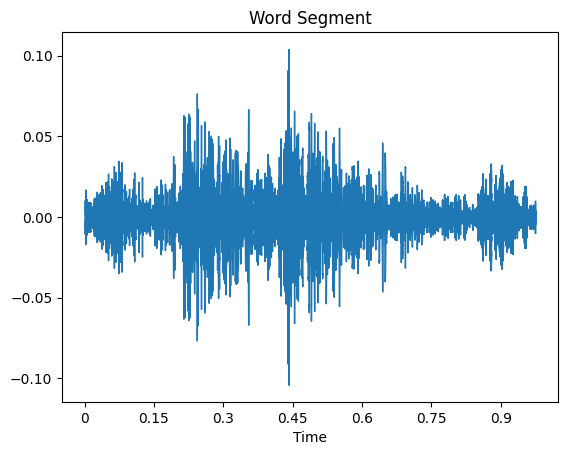

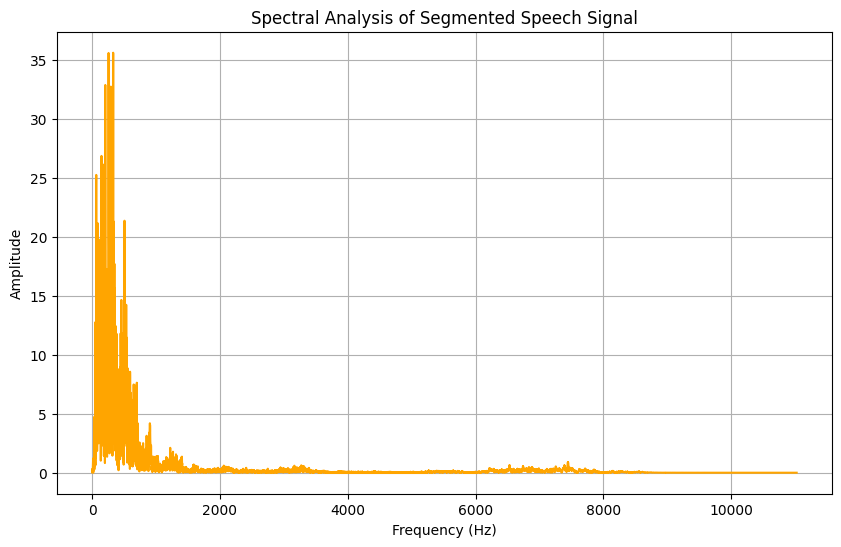

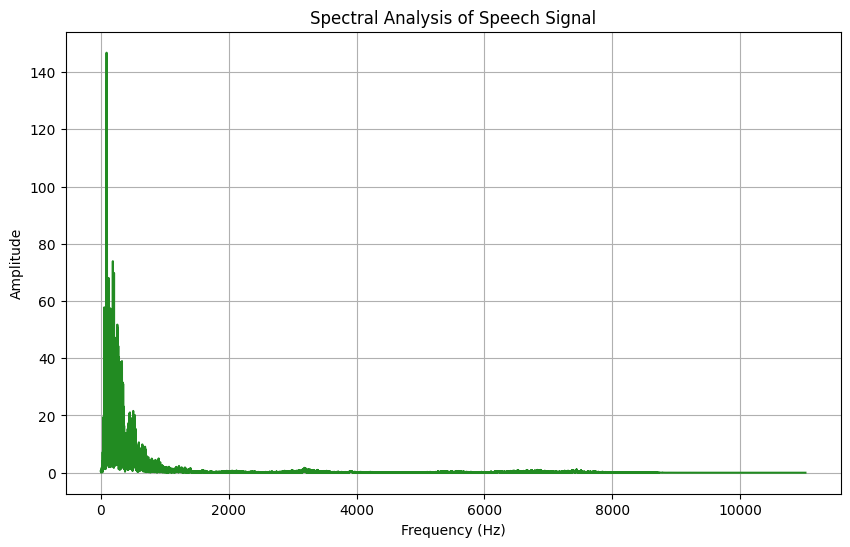

In [10]:
librosa.display.waveshow(speech_segments[0], sr=sr)
plt.title('Word Segment')

# Play the audio of the word segment
ipd.Audio(speech_segments[0], rate=sr)

fft_output_seg = np.fft.fft(speech_segments[0])
seg_freq = np.fft.fftfreq(len(speech_segments[0]), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

4

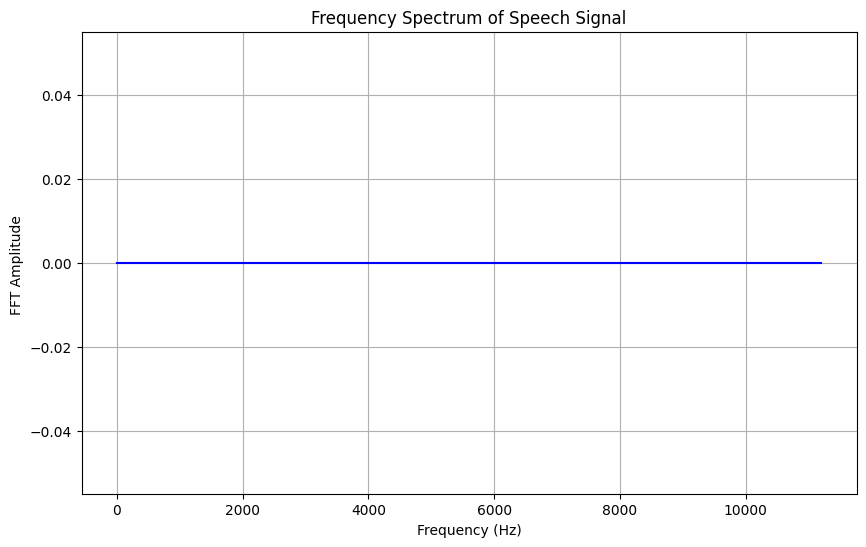

In [11]:
import numpy as np
from scipy.fft import fft
sr4=22500
w_duration = 0.02
w_samples = int(w_duration * sr4)
w_signal = y[:w_samples]

# Compute the FFT
X = fft(w_signal)

# Get the one-sided spectrum
n_oneside = w_samples // 2
frequencies = np.arange(n_oneside) * (sr4 / w_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

5

In [12]:
# Window length in samples (20 ms)
window_length = int(0.02 * sr)

# Hop length (50% overlap for smoother transitions)
hop_length = window_length // 2

# Compute STFT
stft = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
print(stft)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -1.7216196e-02+0.0000000e+00j
   4.0482689e-02+0.0000000e+00j -1.3637916e-05+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  6.0259625e-02+1.9348096e-02j
  -1.5946627e-02-3.3120055e-02j -6.8567729e-06+1.2497241e-05j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -7.9022758e-02-3.2787021e-02j
  -1.5112636e-02+2.2413500e-02j  8.0412647e-06+1.3553230e-05j]
 ...
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  2.5258564e-07-7.3963213e-07j
   2.6704257e-08+1.1948831e-06j  2.6214870e-08-6.7403121e-08j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.0936966e-07+7.0467237e-08j
   2.0957157e-07-2.4115812e-07j -3.1382335e-08-2.1252010e-08j]
 [ 0.0000000e+00+0.0000000e+00j  0.00000

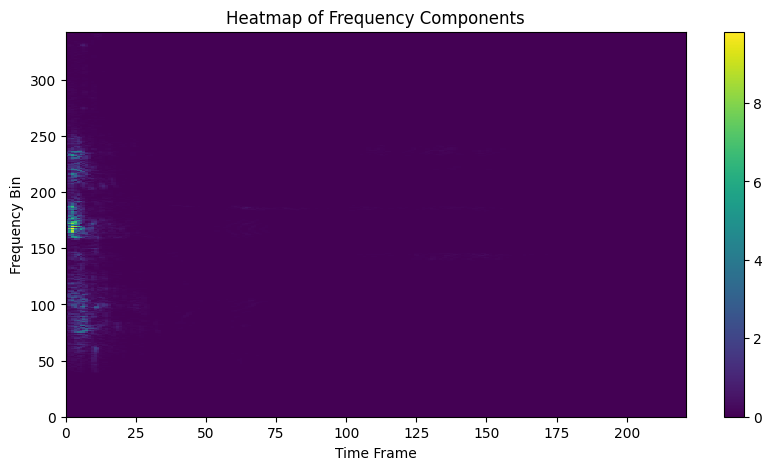

In [13]:
# Get magnitude of STFT (representing frequency component amplitudes)
amplitude = np.abs(stft)

# Stack frequency components as columns in a matrix
frequency_matrix = np.transpose(amplitude)

# Create a heatmap plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(frequency_matrix, vmin=0, vmax=np.max(amplitude))
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.title("Heatmap of Frequency Components")
plt.colorbar()
plt.show()

6

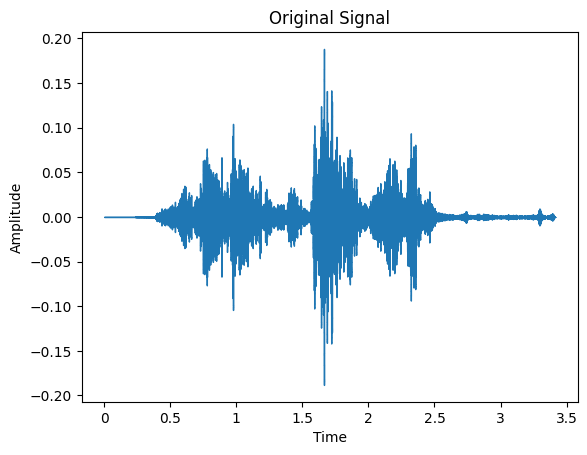

<ipython-input-14-ec29e4edce28>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


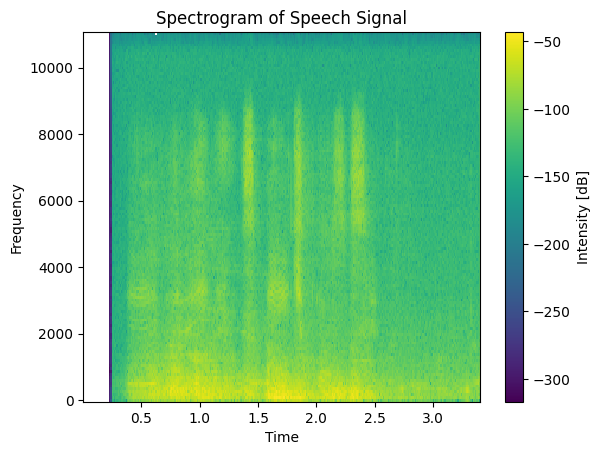

In [14]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()